In [1]:
# 라이브러리 로드

import pandas as pd
import numpy as np
import random
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split # 학습, 테스트set 구분
from sklearn.tree import export_graphviz # tree 시각화를 위해
# export_graphviz : 의사결정나무에 대한 graphviz dot data 생성하는 함수
import graphviz # tree 시각화
import sklearn.metrics as mt # 성능지표를 계산하기 위해 import
from sklearn.model_selection import cross_val_score, cross_validate # 교차검증
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
import os

In [2]:
decd = pd.read_csv('C:/JHY/heart_failure_clinical_records_dataset.csv')
decd

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,280,0


In [3]:
dec2 = decd.iloc[:,[0,1,2,3,4,5,6,7,8,9,10]]

outlier = 10000000
dec2.count().sum()*0.03

for i in range(99):
    r = random.randrange(0, 299)
    c = random.randrange(0, 10)
    dec2.iloc[r,c] = outlier
dec3 = pd.concat([dec2, decd.DEATH_EVENT], axis = 1)

In [4]:
seed = 5764
features = decd.iloc[:,[0,1,2,3,4,5,6,7,8,9,10]]
features2 = dec3.iloc[:, [0,1,2,3,4,5,6,7,8,9,10]]
# 학습, 테스트 데이터 분리 (0.7:0.3)
x_train, x_test, y_train, y_test = train_test_split(features, decd.DEATH_EVENT, test_size=0.7, random_state=seed)
x_train2, x_test2, y_train2, y_test2 =  train_test_split(features2, dec3.DEATH_EVENT, test_size=0.7, random_state=seed)

In [5]:
features2

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,0,4
1,55.0,10000000,7861,0,38,0,263358.03,1.1,136,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,10000000,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,0,7
4,65.0,1,160,1,10000000,0,327000.00,2.7,116,0,8
...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,271
296,10000000.0,0,2060,1,60,0,742000.00,0.8,138,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,280


In [6]:
decd.iloc[:,[0,1,2,3,4,5,6,7,8,9,10]]
dec3.iloc[:,[0,1,2,3,4,5,6,7,8,9,10]]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,0,4
1,55.0,10000000,7861,0,38,0,263358.03,1.1,136,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,10000000,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,0,7
4,65.0,1,160,1,10000000,0,327000.00,2.7,116,0,8
...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,271
296,10000000.0,0,2060,1,60,0,742000.00,0.8,138,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,280


In [7]:
dt_clf = DecisionTreeClassifier(random_state=5764)
dt_clf2 = DecisionTreeClassifier(random_state=5764)
dt_clf.fit(x_train, y_train) # 학습
dt_clf2.fit(x_train2, y_train2)

DecisionTreeClassifier(random_state=5764)

In [8]:
# export_graphviz( )의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성
export_graphviz(dt_clf, out_file="tree.dot", class_names = decd.columns[11], feature_names = decd.columns[0:11], impurity=True, filled=True)
# export_graphviz( )의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성
export_graphviz(dt_clf2, out_file="tree.dot2", class_names = dec3.columns[11], feature_names = dec3.columns[0:11], impurity=True, filled=True)

In [9]:
 decd.columns[0:11]

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'smoking', 'time'],
      dtype='object')

[ max_depth의 제약이 없는 경우의 Decision Tree 시각화 ]


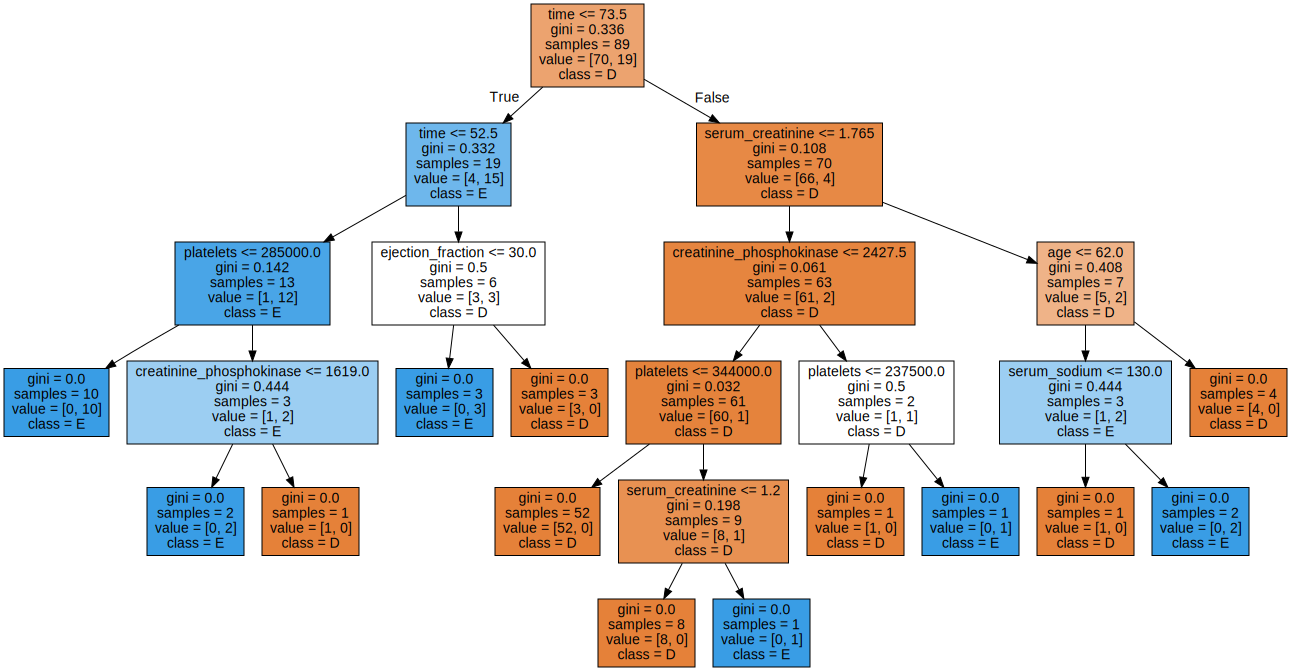

In [10]:
print('[ max_depth의 제약이 없는 경우의 Decision Tree 시각화 ]')
# 위에서 생성된 tree.dot 파일을 Graphiviz 가 읽어서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

[ max_depth의 제약이 없는 경우의 Decision Tree 시각화 ]


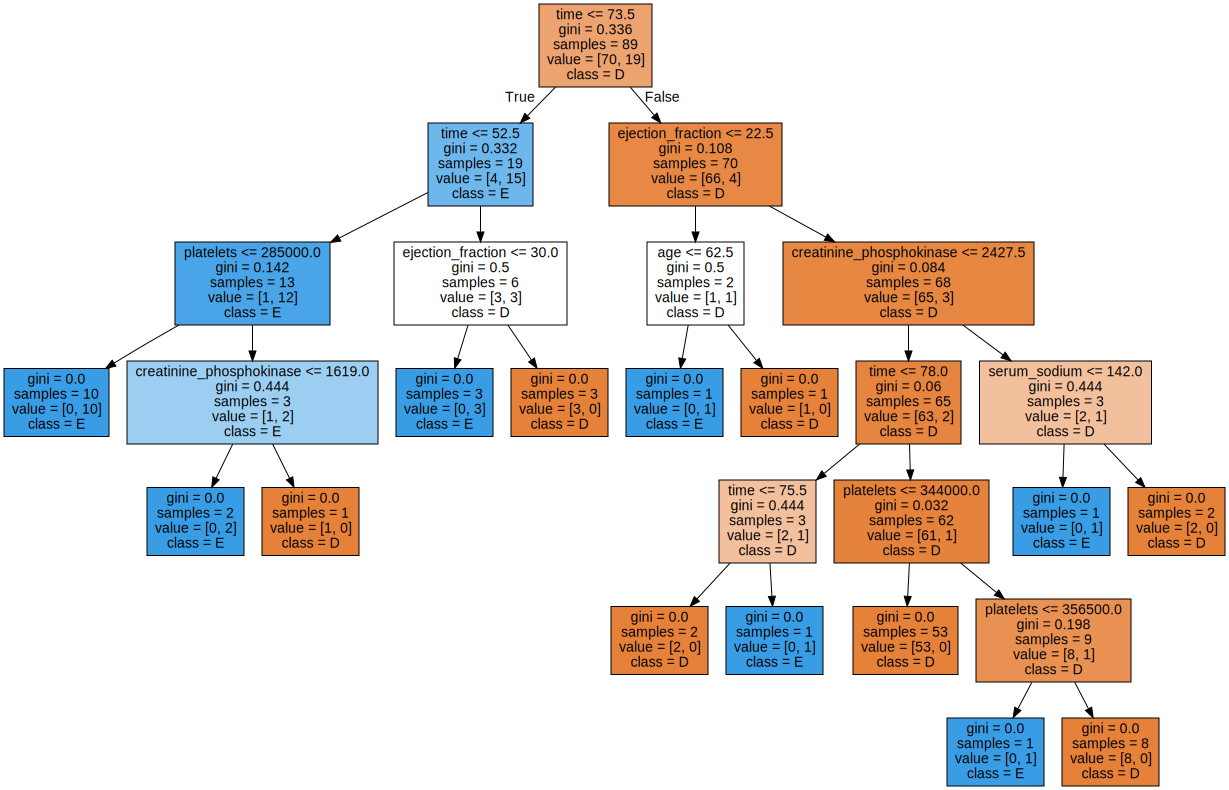

In [11]:
print('[ max_depth의 제약이 없는 경우의 Decision Tree 시각화 ]')
# 위에서 생성된 tree.dot 파일을 Graphiviz 가 읽어서 시각화
with open("tree.dot2") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [12]:
y_pred = dt_clf.predict(x_test) 
y_pred2 = dt_clf2.predict(x_test2)

In [13]:
# 학습결과 평가
print("Train_Accuracy : ", dt_clf.score(x_train, y_train), '\n')
print("Test_Accuracy : ", dt_clf.score(x_test, y_test), '\n')
print("Train_Accuracy_with_outlier : ", dt_clf2.score(x_train2, y_train2), '\n')
print("Test_Accuracy_with_outlier : ", dt_clf2.score(x_test2, y_test2), '\n')

accuracy = mt.accuracy_score(y_test, y_pred)
recall = mt.recall_score(y_test, y_pred)
precision = mt.precision_score(y_test, y_pred)
f1_score = mt.f1_score(y_test, y_pred)
matrix = mt.confusion_matrix(y_test, y_pred)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Recall: ', format(recall,'.2f'),'\n')
print('Precision: ', format(precision,'.2f'),'\n')
print('F1_score: ', format(f1_score,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)

Train_Accuracy :  1.0 

Test_Accuracy :  0.7904761904761904 

Train_Accuracy_with_outlier :  1.0 

Test_Accuracy_with_outlier :  0.7666666666666667 

Accuracy:  0.79 

Recall:  0.66 

Precision:  0.74 

F1_score:  0.70 

Confusion Matrix: 
 [[115  18]
 [ 26  51]]


In [14]:
# 교차검증

x = features
y = decd.DEATH_EVENT

# 각 폴드의 스코어 
scores = cross_val_score(dt_clf, x, y, cv = 5)

print('Averaged results of cross validation: ', scores.mean())

Averaged results of cross validation:  0.6422033898305085


In [15]:
pd.DataFrame(cross_validate(dt_clf, x, y, cv =5))

,fit_time,score_time,test_score
0,0.008976,0.005985,0.366667
1,0.011968,0.006006,0.866667
2,0.007978,0.004986,0.716667
3,0.005978,0.002992,0.600000
4,0.005984,0.003990,0.661017


In [16]:
# test set에 대한 스코어(정확도)
dt_clf.score(x_test, y_test)

0.7904761904761904

In [17]:
pruned_dt_clf = DecisionTreeClassifier(max_depth=2, random_state=156) # max_depth=3으로 제한
pruned_dt_clf .fit(x_train, y_train)

print("Accuracy of training set: {:.3f}".format(pruned_dt_clf.score(x_train, y_train)))
print("Accuracy of test set: {:.3f}".format(pruned_dt_clf.score(x_test, y_test)))


Accuracy of training set: 0.910
Accuracy of test set: 0.790


In [18]:
# export_graphviz( )의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(pruned_dt_clf, out_file="prunedtree.dot", class_names = decd.columns[11], feature_names = decd.columns[0:11], impurity=True, filled=True)

[ max_depth가 2인 경우의 Decision Tree 시각화 ]


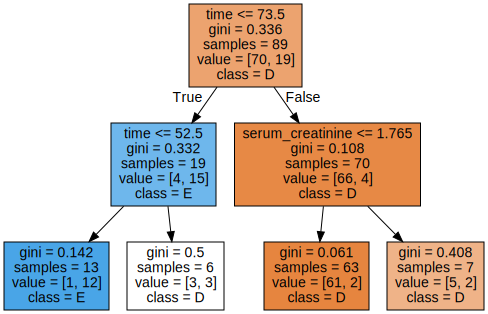

In [19]:
print('[ max_depth가 2인 경우의 Decision Tree 시각화 ]')
# 위에서 생성된 tree.dot 파일을 Graphiviz 가 읽어서 시각화
with open("prunedtree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)